In [1]:
import simpy
import numpy as np
import sys
from scipy import interpolate
from IPython.core.debugger import set_trace
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from virtualphysiology.organ.organ import OrganBase2, OrganInfo, Node
from virtualphysiology.chemical.chemical import Compartment, Reaction2
from virtualphysiology.organ.circulation import BloodVessel, Heart

In [4]:
def graficos(human, title, init):
    #set_trace()
    a=human.get('arteria').getDataFrame()[init:]
    c=human.get('capilar').getDataFrame()[init:]
    v=human.get('vena').getDataFrame()[init:]
    h=human.get('corazon').getDataFrame()[init:]

    plt.title('Presión '+ title)
    plt.plot(a['p'],label='arteria')
    plt.plot(c['p'],label='capilar')
    plt.plot(v['p'],label='vena')
    plt.legend(loc='upper right')
    plt.rcParams['figure.dpi'] = 150
    plt.show()

    plt.title('Volumen '+ title)
    plt.plot(a['V'],label='arteria')
    plt.plot(c['V'],label='capilar')
    plt.plot(v['V'],label='vena')
    plt.plot(a['V']+c['V']+v['V']+h['V'],label='Vol. total')
    plt.legend(loc='upper right')
    plt.rcParams['figure.dpi'] = 150
    plt.show()

In [5]:
def newHuman():
    per = 0.01

    human = Node('Human')
    
    species={
        'O2':1,
        'CO2':0}
    
    human.add('arteria',BloodVessel('Arteria',V0=500,E=1/1.5,R=0.06,Vb=0,
                                    species=species,vessels=[("corazon",1),("capilar",0)],periodo = per))
    species={
        'O2':0,
        'CO2':0}
    human.add('capilar',BloodVessel('Capilar', V0=1,E=1/1.5,R=1.2,Vb=1,
                                    species=species,vessels=[("arteria",0),("vena",0)],periodo = per))
    human.add('vena',BloodVessel('Vena', V0=4600,E=1/50,R=0.016,Vb=4500,
                                 species=species,vessels=[("capilar",0),("corazon",-1)],periodo = per))
    human.add('corazon',Heart('Heart', HR=60, Es=3, Ed=0.06, V0=1,R=0.06,Vb=17,species=species,LVin="vena",
                                LVout="arteria",periodo = per))
    return human

In [6]:
human = newHuman()
human.describe()

Human
 arteria : Arteria
 capilar : Capilar
 vena : Vena
 corazon : Heart


In [7]:
env = simpy.Environment()
human.connect(env)
env.run(until=40)

  connected-> arteria : Arteria
  connected-> capilar : Capilar
  connected-> vena : Vena
  connected-> corazon : Heart


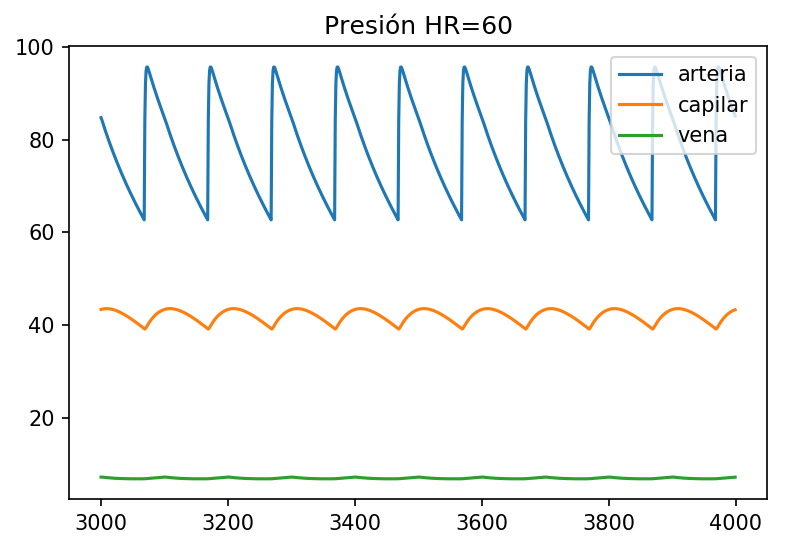

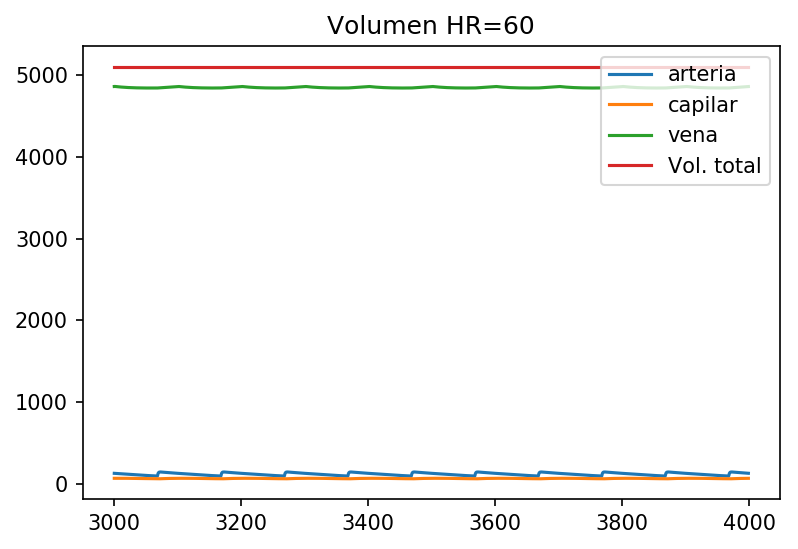

In [9]:
graficos(human,'HR=60',init=3000)

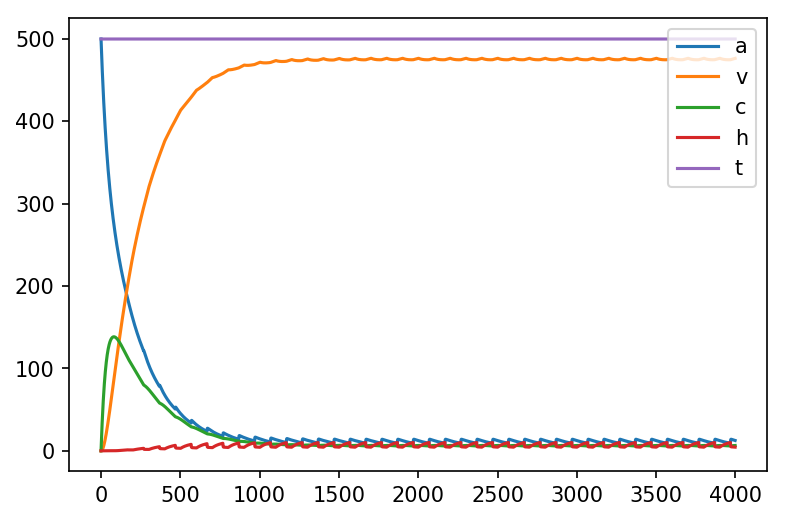

In [10]:
col='moles'

a=human.get('arteria').getDataFrame()[col]
v=human.get('vena').getDataFrame()[col]
c=human.get('capilar').getDataFrame()[col]
h=human.get('corazon').getDataFrame()[col]


ao2=[e['O2'] for e in a]
vo2=[e['O2'] for e in v]
co2=[e['O2'] for e in c]
ho2=[e['O2'] for e in h]

to2=[ao2[i]+vo2[i]+co2[i]+ho2[i] for i in range(len(ao2))]


r=0
plt.plot(ao2[r:-1],label='a')
plt.plot(vo2[r:-1],label='v')
plt.plot(co2[r:-1],label='c')
plt.plot(ho2[r:-1],label='h')
plt.plot(to2[r:-1],label='t')
plt.legend(loc='upper right')

plt.show()

4000


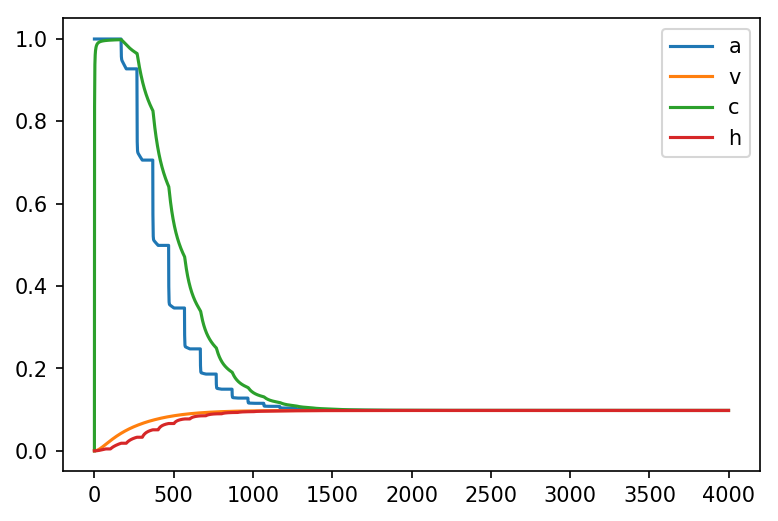

In [11]:
col='species'

a=human.get('arteria').getDataFrame()[col]
v=human.get('vena').getDataFrame()[col]
c=human.get('capilar').getDataFrame()[col]
h=human.get('corazon').getDataFrame()[col]


ao2=[e['O2'] for e in a]
vo2=[e['O2'] for e in v]
co2=[e['O2'] for e in c]
ho2=[e['O2'] for e in h]

print(len(ao2))

a=0
b=4000
plt.plot(ao2[a:b],label='a')
plt.plot(vo2[a:b],label='v')
plt.plot(co2[a:b],label='c')
plt.plot(ho2[a:b],label='h')

plt.legend(loc='upper right')

plt.show()